In [2]:
using DataFrames
using StatsBase
using Dagitty
using Turing
using StatsPlots
using StatisticalRethinking
using Logging

default(labels=false)
Logging.disable_logging(Logging.Warn);

# Easy problems

* 5E1: 2 and 4
* 5E2: mu = a + pA * animals + pP * plants

* 5E3: we need three models: with each predictor and both variables included in the model.

* 5E4: 2, 4 and 5

# Medium problems

## 5M1

In [3]:
Random.seed!(1)
N = 1000
a = rand(Normal(2), N)
b = rand(MvNormal(a .+ 10, 0.1))
c = rand(MvNormal(a .- 20, 0.2))
d = DataFrame(:a => a, :b => b, :c => c);

In [4]:
@model function model_m5m1_bc(B, C)
    a ~ Normal()
    pB ~ Normal()
    μ = @. a + pB * B
    σ ~ Exponential()
    C ~ MvNormal(μ, σ)
end

m5m1_bc = DataFrame(sample(model_m5m1_bc(d.b, d.c), NUTS(), 1000))
precis(m5m1_bc)

┌───────┬────────────────────────────────────────────────────────────┐
│ param │     mean     std      5.5%       50%     94.5%   histogram │
├───────┼────────────────────────────────────────────────────────────┤
│     a │ -29.6537  0.0859  -29.7894  -29.6513  -29.5188  ▁▁▄▆██▆▃▂▁ │
│    pB │   0.9717  0.0072    0.9602    0.9715    0.9831   ▁▂▄██▆▃▁▁ │
│     σ │   0.2275  0.0052     0.219    0.2273     0.236     ▁▂▆█▅▂▁ │
└───────┴────────────────────────────────────────────────────────────┘


In [5]:
@model function model_m5m1_ac(A, C)
    a ~ Normal()
    pA ~ Normal()
    μ = @. a + pA * A
    σ ~ Exponential()
    C ~ MvNormal(μ, σ)
end

m5m1_ac = DataFrame(sample(model_m5m1_ac(d.a, d.c), NUTS(), 1000))
precis(m5m1_ac)

┌───────┬────────────────────────────────────────────────────────────┐
│ param │     mean     std      5.5%       50%     94.5%   histogram │
├───────┼────────────────────────────────────────────────────────────┤
│     a │ -19.9947  0.0149  -20.0178  -19.9949  -19.9713  ▁▁▁▄██▇▅▂▁ │
│    pA │   1.0003  0.0066    0.9903    1.0003    1.0108   ▁▁▅██▅▂▁▁ │
│     σ │   0.2074  0.0047    0.2003    0.2072    0.2149     ▁▁▆█▅▁▁ │
└───────┴────────────────────────────────────────────────────────────┘


In [6]:
@model function model_m5m1_abc(A, B, C)
    a ~ Normal()
    pA ~ Normal()
    pB ~ Normal()
    μ = @. a + pA*A + pB*B
    σ ~ Exponential()
    C ~ MvNormal(μ, σ)
end

m5m1_abc = DataFrame(sample(model_m5m1_abc(d.a, d.b, d.c), NUTS(), 1000))
precis(m5m1_abc)

┌───────┬──────────────────────────────────────────────────────────┐
│ param │     mean     std      5.5%       50%    94.5%  histogram │
├───────┼──────────────────────────────────────────────────────────┤
│     a │ -14.7602  0.5741  -15.6385  -14.7792  -13.772   ▁▃▇█▆▃▁▁ │
│    pA │   1.5264  0.0576    1.4371    1.5239   1.6221   ▁▂▇█▆▃▁▁ │
│    pB │   -0.524  0.0574   -0.6222   -0.5221  -0.4356   ▁▁▃▆█▇▃▁ │
│     σ │    0.218  0.0053    0.2096    0.2178   0.2264  ▁▁▂▅█▆▂▁▁ │
└───────┴──────────────────────────────────────────────────────────┘


## 5M2

In [7]:
Random.seed!(1)
N = 1000
a = rand(Normal(2), N)
b = rand(MvNormal(a, 0.1))
c = rand(MvNormal(-a, 0.2))
d = DataFrame(:a => a, :b => b, :c => c);

In [8]:
@model function model_m5m1_bc(B, C)
    a ~ Normal()
    pB ~ Normal()
    μ = @. a + pB * B
    σ ~ Exponential()
    C ~ MvNormal(μ, σ)
end

m5m1_bc = DataFrame(sample(model_m5m1_bc(d.b, d.c), NUTS(), 1000))
precis(m5m1_bc)

┌───────┬─────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%    histogram │
├───────┼─────────────────────────────────────────────────────────┤
│     a │ -0.0295  0.0154  -0.0537    -0.03  -0.0039  ▁▁▂▅██▅▃▁▁▁ │
│    pB │ -0.9831  0.0071  -0.9949  -0.9827  -0.9719  ▁▁▂▄▆█▆▃▁▁▁ │
│     σ │  0.2371  0.0054   0.2289   0.2368   0.2464      ▁▂▇█▅▂▁ │
└───────┴─────────────────────────────────────────────────────────┘


In [9]:
@model function model_m5m1_ac(A, C)
    a ~ Normal()
    pA ~ Normal()
    μ = @. a + pA * A
    σ ~ Exponential()
    C ~ MvNormal(μ, σ)
end

m5m1_ac = DataFrame(sample(model_m5m1_ac(d.a, d.c), NUTS(), 1000))
precis(m5m1_ac)

┌───────┬───────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%  histogram │
├───────┼───────────────────────────────────────────────────────┤
│     a │  0.0014  0.0142   -0.021   0.0009    0.024   ▁▂▆██▇▃▁ │
│    pA │ -0.9981  0.0063  -1.0087  -0.9979  -0.9884   ▁▁▄██▇▃▁ │
│     σ │  0.2076  0.0046   0.2004   0.2074   0.2154   ▁▁▅█▅▂▁▁ │
└───────┴───────────────────────────────────────────────────────┘


In [10]:
@model function model_m5m1_abc(A, B, C)
    a ~ Normal()
    pA ~ Normal()
    pB ~ Normal()
    μ = @. a + pA*A + pB*B
    σ ~ Exponential()
    C ~ MvNormal(μ, σ)
end

m5m1_abc = DataFrame(sample(model_m5m1_abc(d.a, d.b, d.c), NUTS(), 1000))
precis(m5m1_abc)

┌───────┬───────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%  histogram │
├───────┼───────────────────────────────────────────────────────┤
│     a │  0.0026  0.0139  -0.0196   0.0025   0.0251  ▁▂▄▇█▆▃▁▁ │
│    pA │ -1.1041  0.0642  -1.2061  -1.1016  -1.0011  ▁▁▂▅██▄▂▁ │
│    pB │  0.1056  0.0637    0.004   0.1027   0.2081  ▁▂▄██▅▂▁▁ │
│     σ │  0.2071  0.0044   0.2003    0.207   0.2143    ▁▁▆█▅▁▁ │
└───────┴───────────────────────────────────────────────────────┘


## 5M4

In [188]:
d_div = DataFrame(CSV.File("../data/WaffleDivorce.csv"))
d_loc = DataFrame(CSV.File("../data/LoC_population.csv"))
rename!(d_loc, :State => :Location)
d_loc[!,:perc_mormon] = d_loc.mormonPop ./ d_loc.Pop

d_join = rightjoin(d_loc, d_div; on=:Location)
d_join = d_join[completecases(d_join),:]
disallowmissing!(d_join);

### Three states with very high mormon percentage

Filter them out - they are outliers

In [189]:
d_join[d_join.perc_mormon .> 0.1,:]

,Location,mormonPop,Pop,perc_mormon,Loc,Population,MedianAgeMarriage
,String,Int64,Int64,Float64,String,Float64,Float64
1,Idaho,462069,1860123,0.248408,ID,1.57,23.2
2,Utah,2126216,3310774,0.642211,UT,2.76,23.3
3,Wyoming,67729,581075,0.116558,WY,0.56,24.2


In [190]:
d_join = d_join[d_join.perc_mormon .< 0.1,:];
#d_join = d_join[d_join.perc_mormon .< 0.018,:];

### Final dataset

In [191]:
d = DataFrame(
    :D => standardize(ZScoreTransform, d_join.Divorce),
    :A => standardize(ZScoreTransform, d_join.Marriage),
    :M => standardize(ZScoreTransform, d_join.MedianAgeMarriage),
    :P => standardize(ZScoreTransform, d_join.perc_mormon),
);

### Dag hypothesis

In [100]:
g = Dagitty.DAG(:P => :A, :P => :D, :A => :D, :A => :M)

DAG: {4, 4} directed simple Int64 graph with labels [:A, :D, :M, :P])


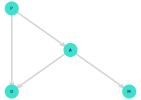

In [63]:
drawdag(g, [1, 0, 2, 0], [1, 2, 2, 0])

In [64]:
implied_conditional_independencies_min(g)

2-element Vector{ConditionalIndependence}:
 ConditionalIndependence(:D, :M, [:A])
 ConditionalIndependence(:M, :P, [:A])

Ok, let's check the second independence, marriage rate is independent on mormons percent conditioned on age at marriage

To do that, we have to build a model predicting M from P and A

### Predict M from P

Result: negative correlation between marriage rate and mormon percent. But checking the chart, looks like there are to cluster of data - with more than 2% of mormons and lower than 2%

In [192]:
@model function model_M_from_P(P, M)
    a ~ Normal(0, 1)
    pP ~ Normal(0, 1)
    μ = @. a + pP*P
    σ ~ Exponential()
    M ~ MvNormal(μ, σ)
end

m5m3_1 = sample(model_M_from_P(d.P, d.M), NUTS(), 1000)
display(m5m3_1)
m5m3_1 = DataFrame(m5m3_1)
precis(m5m3_1)

Chains MCMC chain (1000×15×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 2.42 seconds
Compute duration  = 2.42 seconds
parameters        = a, pP, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           a    0.0018    0.1478     0.0047    0.0046   1153.9303    1.0001    ⋯
          pP   -0.2253    0.1541     0.0049    0.0051   1345.2745    0.9990    ⋯
           σ    1.0033    0.1176     0.0037    0.0040   1159.7707    1.0006    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%   

┌───────┬────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%   94.5%    histogram │
├───────┼────────────────────────────────────────────────────────┤
│     a │  0.0018  0.1478  -0.2307  -0.0031  0.2262  ▁▁▁▂▅█▇▆▂▁▁ │
│    pP │ -0.2253  0.1541  -0.4568  -0.2327  0.0303   ▁▁▄▇█▇▅▂▁▁ │
│     σ │  1.0033  0.1176   0.8317   0.9952  1.2004    ▁▅██▄▁▁▁▁ │
└───────┴────────────────────────────────────────────────────────┘


In [193]:
seq_p = range(extrema(d.P)...; length=30)
μ = StatisticalRethinking.link(m5m3_1, [:a, :pP], seq_p)
μ = hcat(μ...)
μ_mean = mean.(eachcol(μ));

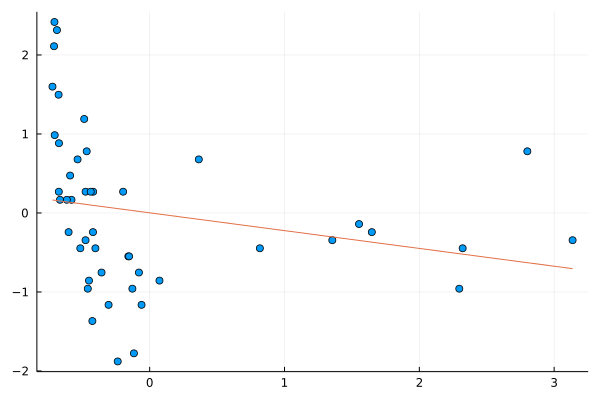

In [194]:
scatter(d.P, d.M)
plot!(seq_p, μ_mean)

### Predict M from P and A

To check that our graph makes sense. If they are independent, coefficient on P will be small

In [195]:
@model function model_M_from_PA(P, A, M)
    a ~ Normal()
    pA ~ Normal()
    pP ~ Normal()
    μ = @. a + pA*A + pP*P
    σ ~ Exponential()
    M ~ MvNormal(μ, σ)
end

m5m3_2 = sample(model_M_from_PA(d.P, d.A, d.M), NUTS(), 1000)
display(m5m3_2)
m5m3_2 = DataFrame(m5m3_2)
precis(m5m3_2)

Chains MCMC chain (1000×16×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 2.81 seconds
Compute duration  = 2.81 seconds
parameters        = a, pP, σ, pA
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           a   -0.0003    0.1151     0.0036    0.0037   1032.6977    0.9998    ⋯
          pA   -0.6865    0.1217     0.0038    0.0022   1010.6322    0.9991    ⋯
          pP    0.0558    0.1182     0.0037    0.0038    871.9597    0.9992    ⋯
           σ    0.7649    0.0837     0.0026    0.0028    752.1287    1.0068    ⋯
                                                              

┌───────┬────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%   94.5%    histogram │
├───────┼────────────────────────────────────────────────────────┤
│     a │ -0.0003  0.1151  -0.1876   0.0023   0.177   ▁▁▂▄██▄▁▁▁ │
│    pA │ -0.6865  0.1217  -0.8787  -0.6875  -0.494    ▁▁▄██▄▂▁▁ │
│    pP │  0.0558  0.1182  -0.1337   0.0608  0.2372    ▁▁▂▆█▇▃▁▁ │
│     σ │  0.7649  0.0837   0.6438   0.7597  0.9086  ▁▃▆██▆▄▂▁▁▁ │
└───────┴────────────────────────────────────────────────────────┘


### Model for two classes: less than 2% mormons and higher that 2%

Looks like mormon percentage doesn't influence marriage rate directly only for states where this percentage is higher than 2%

In [204]:
@model function model_M_from_P_2classes(P, class_idx, M)
    a ~ MvNormal([0,0], 1)
    pP ~ MvNormal([0,0], 1)
    μ = @. a[class_idx] + pP[class_idx]*P
    σ ~ Exponential()
    M ~ MvNormal(μ, σ)
end

class_idx = ifelse.(d_join.perc_mormon .< 0.02, 1, 2)
m5m3_3 = sample(model_M_from_P_2classes(d.P, class_idx, d.M), NUTS(), 1000)
display(m5m3_3)
m5m3_3 = DataFrame(m5m3_3)
rename!(c -> replace(c, r"\[|\]" => ""), m5m3_3)
precis(m5m3_3)

Chains MCMC chain (1000×17×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 2.89 seconds
Compute duration  = 2.89 seconds
parameters        = pP[2], pP[1], σ, a[1], a[2]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

        a[1]   -0.6712    0.2515     0.0080    0.0095   559.9109    1.0013     ⋯
        a[2]   -0.3835    0.6273     0.0198    0.0342   481.9504    0.9992     ⋯
       pP[1]   -1.7624    0.5041     0.0159    0.0168   522.9033    1.0004     ⋯
       pP[2]    0.0690    0.3062     0.0097    0.0186   504.7378    0.9991     ⋯
           σ    0.8742    0.0950     0.0030    

┌───────┬────────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%       histogram │
├───────┼────────────────────────────────────────────────────────────┤
│    a1 │ -0.6712  0.2515  -1.0593  -0.6682  -0.2658       ▁▁▃▆█▇▃▁▁ │
│    a2 │ -0.3835  0.6273  -1.4165  -0.3867   0.6241       ▁▁▂▃██▆▃▁ │
│   pP1 │ -1.7624  0.5041  -2.5362   -1.773  -0.9749        ▁▂▆█▆▂▁▁ │
│   pP2 │   0.069  0.3062  -0.4299    0.072   0.5422     ▁▁▂▅▇█▆▄▁▁▁ │
│     σ │  0.8742   0.095   0.7387   0.8659   1.0395  ▁▁▃▆██▆▄▃▁▁▁▁▁ │
└───────┴────────────────────────────────────────────────────────────┘


In [205]:
seq_p1 = range(extrema(d.P[class_idx .== 1])...; length=30)
seq_p2 = range(extrema(d.P[class_idx .== 2])...; length=30)
μ1 = StatisticalRethinking.link(m5m3_3, [:a1, :pP1], seq_p1)
μ2 = StatisticalRethinking.link(m5m3_3, [:a2, :pP2], seq_p2)
μ1 = hcat(μ1...)
μ1_mean = mean.(eachcol(μ1));
μ2 = hcat(μ2...)
μ2_mean = mean.(eachcol(μ2));

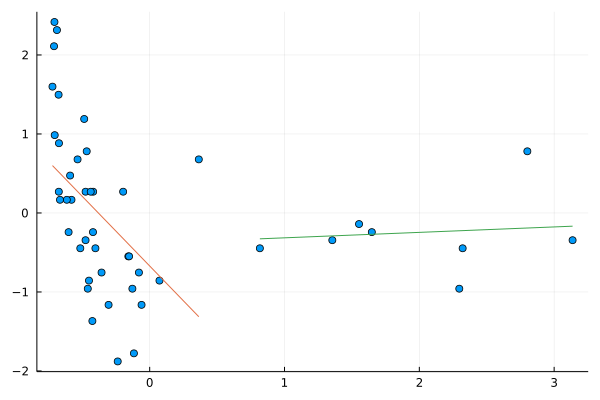

In [206]:
scatter(d.P, d.M)
plot!(seq_p1, μ1_mean)
plot!(seq_p2, μ2_mean)

### Unified model predict D from P A M

In [218]:
@model function model_D_from_P(P, D)
    a ~ Normal(0, 0.2)
    pP ~ Normal(0, 0.5)
    μ = @. a + pP*P
    σ ~ Exponential()
    D ~ MvNormal(μ, σ)
end

m5m3_4_chain = sample(model_D_from_P(d.P, d.D), NUTS(), 1000)
display(m5m3_4_chain)
m5m3_4 = DataFrame(m5m3_4_chain)
precis(m5m3_4)

Chains MCMC chain (1000×15×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 2.5 seconds
Compute duration  = 2.5 seconds
parameters        = a, pP, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           a    0.0029    0.1129     0.0036    0.0026   1405.4747    0.9993    ⋯
          pP    0.1492    0.1450     0.0046    0.0044   1363.2967    0.9992    ⋯
           σ    1.0088    0.1058     0.0033    0.0037    973.9852    0.9999    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     

┌───────┬─────────────────────────────────────────────────────────┐
│ param │   mean     std     5.5%     50%   94.5%       histogram │
├───────┼─────────────────────────────────────────────────────────┤
│     a │ 0.0029  0.1129  -0.1775  0.0021  0.1809  ▁▁▂▃▅▇██▇▅▃▂▁▁ │
│    pP │ 0.1492   0.145  -0.0881  0.1487  0.3758     ▁▁▂▃▆█▇▄▁▁▁ │
│     σ │ 1.0088  0.1058   0.8542  1.0036  1.1986  ▁▁▂▄███▆▅▂▂▁▁▁ │
└───────┴─────────────────────────────────────────────────────────┘


In [245]:
seq_p = range(extrema(d.P)...; length=30)
μ = StatisticalRethinking.link(m5m3_4, [:a, :pP], seq_p)
μ = hcat(μ...)
μ_mean = mean.(eachcol(μ));
μ_PI = PI.(eachcol(μ))
μ_PI = vcat(μ_PI'...);
sim = StatisticalRethinking.simulate(m5m3_4, [:a, :pP, :σ], seq_p)
sim_PI = PI.(eachcol(sim))
sim_PI = vcat(sim_PI'...);

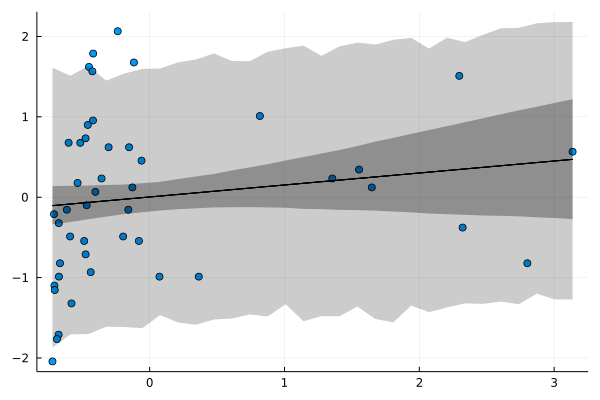

In [247]:
scatter(d.P, d.D)
plot!(seq_p, [μ_mean μ_mean]; fillrange=μ_PI, c=:black, fillalpha=0.3)
plot!(seq_p, [μ_mean μ_mean]; fillrange=sim_PI, c=:black, fillalpha=0.2)

In [213]:
@model function model_D_from_PA(P, A, D)
    a ~ Normal(0, 1)
    pP ~ Normal(0, 1)
    pA ~ Normal(0, 1)
    μ = @. a + pP*P + pA*A
    σ ~ Exponential()
    D ~ MvNormal(μ, σ)
end

m5m3_4_chain = sample(model_D_from_PA(d.P, d.A, d.D), NUTS(), 1000)
display(m5m3_4_chain)
m5m3_4 = DataFrame(m5m3_4_chain)
precis(m5m3_4)

Chains MCMC chain (1000×16×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 4.32 seconds
Compute duration  = 4.32 seconds
parameters        = a, pP, σ, pA
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           a    0.0044    0.1260     0.0040    0.0042   1040.1076    1.0000    ⋯
          pP   -0.0357    0.1521     0.0048    0.0034    786.5741    0.9994    ⋯
          pA    0.4800    0.1474     0.0047    0.0038    816.5221    1.0000    ⋯
           σ    0.9180    0.0962     0.0030    0.0031    771.1194    1.0023    ⋯
                                                              

┌───────┬───────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%   94.5%       histogram │
├───────┼───────────────────────────────────────────────────────────┤
│     a │  0.0044   0.126  -0.1905  -0.0024  0.2076      ▁▁▂▄█▇▅▂▁▁ │
│    pP │ -0.0357  0.1521   -0.273  -0.0365  0.2037     ▁▁▁▄▆██▄▂▁▁ │
│    pA │    0.48  0.1474   0.2449   0.4785  0.7134      ▁▁▃▇██▅▂▁▁ │
│     σ │   0.918  0.0962   0.7714   0.9111  1.0869  ▁▁▃▅█▇▆▃▂▁▁▁▁▁ │
└───────┴───────────────────────────────────────────────────────────┘


In [214]:
@model function model_D_from_PM(P, M, D)
    a ~ Normal(0, 1)
    pP ~ Normal(0, 1)
    pM ~ Normal(0, 1)
    μ = @. a + pP*P + pM*M
    σ ~ Exponential()
    D ~ MvNormal(μ, σ)
end

m5m3_4_chain = sample(model_D_from_PM(d.P, d.M, d.D), NUTS(), 1000)
display(m5m3_4_chain)
m5m3_4 = DataFrame(m5m3_4_chain)
precis(m5m3_4)

Chains MCMC chain (1000×16×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 4.31 seconds
Compute duration  = 4.31 seconds
parameters        = a, pP, pM, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           a   -0.0026    0.1041     0.0033    0.0028   1621.6874    0.9998    ⋯
          pP    0.0093    0.1071     0.0034    0.0018   1457.3006    0.9995    ⋯
          pM   -0.7137    0.1102     0.0035    0.0028   1422.7712    0.9993    ⋯
           σ    0.7244    0.0795     0.0025    0.0029   1014.5722    1.0059    ⋯
                                                              

┌───────┬───────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%   94.5%       histogram │
├───────┼───────────────────────────────────────────────────────────┤
│     a │ -0.0026  0.1041  -0.1643  -0.0028  0.1608  ▁▁▁▂▅███▇▅▃▁▁▁ │
│    pP │  0.0093  0.1071  -0.1656   0.0088  0.1814  ▁▁▁▃▄▆██▇▄▃▂▁▁ │
│    pM │ -0.7137  0.1102  -0.8797  -0.7175   -0.54        ▁▁▄█▇▃▁▁ │
│     σ │  0.7244  0.0795   0.6097   0.7212  0.8535     ▁▂▅██▇▄▂▁▁▁ │
└───────┴───────────────────────────────────────────────────────────┘


In [217]:
@model function model_D_from_PMA(P, M, A, D)
    a ~ Normal(0, 0.5)
    pP ~ Normal(0, 0.5)
    pM ~ Normal(0, 0.5)
    pA ~ Normal(0, 0.5)
    μ = @. a + pP*P + pM*M + pA*A
    σ ~ Exponential()
    D ~ MvNormal(μ, σ)
end

m5m3_4_chain = sample(model_D_from_PMA(d.P, d.M, d.A, d.D), NUTS(), 1000)
display(m5m3_4_chain)
m5m3_4 = DataFrame(m5m3_4_chain)
precis(m5m3_4)

Chains MCMC chain (1000×17×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 3.23 seconds
Compute duration  = 3.23 seconds
parameters        = a, pP, pM, σ, pA
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           a    0.0013    0.1078     0.0034    0.0029   1175.5015    0.9994    ⋯
          pP    0.0118    0.1140     0.0036    0.0023   1046.9982    0.9990    ⋯
          pM   -0.6890    0.1336     0.0042    0.0027    932.4393    0.9991    ⋯
          pA    0.0020    0.1413     0.0045    0.0040    898.2860    0.9990    ⋯
           σ    0.7253    0.0779     0.0025    0.0036    8

┌───────┬─────────────────────────────────────────────────────────┐
│ param │   mean     std     5.5%      50%    94.5%     histogram │
├───────┼─────────────────────────────────────────────────────────┤
│     a │ 0.0013  0.1078  -0.1673     -0.0    0.172     ▁▁▅██▄▁▁▁ │
│    pP │ 0.0118   0.114  -0.1684   0.0107   0.1905      ▁▁▄██▅▂▁ │
│    pM │ -0.689  0.1336  -0.9044  -0.6946  -0.4644    ▁▁▂▄██▅▂▁▁ │
│    pA │  0.002  0.1413  -0.2129  -0.0033   0.2282  ▁▁▁▂▅█▇▅▂▁▁▁ │
│     σ │ 0.7253  0.0779   0.6074   0.7198   0.8568    ▁▂▄██▇▄▂▁▁ │
└───────┴─────────────────────────────────────────────────────────┘


## 5M5

For that problem we need two extra data pieces:

* amount of restaurants visits
* amount of non-car transportation for population (walking, byking, etc)

By regressing those variables into model we might find the factors influencing obesity and gasoline price

# Hard problems

## 5H1

In [255]:
g = Dagitty.DAG(:M => :A, :A => :D)

DAG: {3, 2} directed simple Int64 graph with labels [:A, :D, :M])


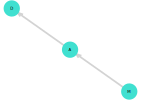

In [256]:
drawdag(g)

In [13]:
implied_conditional_independencies(g)

1-element Vector{ConditionalIndependence}:
 ConditionalIndependence(:D, :M, [:A])

To check it, we first check M -> A influence (it should be high)
Then we check M, A -> D. It should have high A coefficient, but low M.

In [248]:
d = DataFrame(CSV.File("../data/WaffleDivorce.csv"))
d[!,:D] = standardize(ZScoreTransform, d.Divorce)
d[!,:M] = standardize(ZScoreTransform, d.Marriage)
d[!,:A] = standardize(ZScoreTransform, d.MedianAgeMarriage);

### Check M -> A model

In [249]:
@model function m5h1_ma(M, A)
    σ ~ Exponential(1)
    a ~ Normal(0, 0.2)
    bM ~ Normal(0, 0.5)
    μ = @. a + bM * M
    A ~ MvNormal(μ, σ)
end

m5h1_1_ch = sample(m5h1_ma(d.M, d.A), NUTS(), 1000)
m5h1_1 = DataFrame(m5h1_1_ch)
precis(m5h1_1)

┌───────┬──────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%   94.5%      histogram │
├───────┼──────────────────────────────────────────────────────────┤
│     σ │  0.7097  0.0688   0.6097   0.7036  0.8267   ▁▁▅██▅▂▁▁▁▁▁ │
│     a │    -0.0  0.0881  -0.1403   0.0005  0.1327       ▁▁▃██▃▁▁ │
│    bM │ -0.6863  0.0985  -0.8451  -0.6844   -0.52  ▁▁▂▃▅▆█▆▄▂▁▁▁ │
└───────┴──────────────────────────────────────────────────────────┘


### Check M, A -> D model

In [251]:
@model function m5h1_mad(M, A, D)
    σ ~ Exponential(1)
    a ~ Normal(0, 0.2)
    bM ~ Normal(0, 0.5)
    bA ~ Normal(0, 0.5)
    μ = @. a + bM*M + bA*A
    D ~ MvNormal(μ, σ)
end

m5h1_2_ch = sample(m5h1_mad(d.M, d.A, d.D), NUTS(), 1000)
m5h1_2 = DataFrame(m5h1_2_ch)
precis(m5h1_2)

┌───────┬──────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%     histogram │
├───────┼──────────────────────────────────────────────────────────┤
│     σ │  0.8292   0.085   0.7078   0.8209   0.9725  ▁▂▅██▇▄▂▁▁▁▁ │
│     a │ -0.0054   0.105  -0.1811  -0.0038    0.167      ▁▁▄██▄▁▁ │
│    bM │ -0.0558  0.1492  -0.2896  -0.0564   0.1867   ▁▁▂▄▅█▅▃▁▁▁ │
│    bA │ -0.6002   0.151  -0.8225  -0.6052  -0.3545    ▁▁▃▆██▅▃▁▁ │
└───────┴──────────────────────────────────────────────────────────┘


Ok, looks like modelling result is consistent with this DAG

## 5H2

To make a counterfactual plots for M -> A -> D model, we need:
* fit the model for M -> A and model for A -> D
* half the marriage rate for every data sample, predict the marriage age and using it, predict the divorce rate


In [258]:
@model function model_m5h2(M, A, D)
    aM ~ Normal(0, 0.2)
    bM ~ Normal(0, 0.5)
    mu_A = @. aM + bM*M 
    σ_A ~ Exponential(1)
    A ~ MvNormal(mu_A, σ_A)
    
    aA ~ Normal(0, 0.2)
    bA ~ Normal(0, 0.5)
    mu_D = @. aA + bA*A
    σ_D ~ Exponential(1)
    D ~ MvNormal(mu_D, σ_D)
end

m5h2_ch = sample(model_m5h2(d.M, d.A, d.D), NUTS(), 1000)
m5h2 = DataFrame(m5h2_ch)
precis(m5h2)

┌───────┬────────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%       histogram │
├───────┼────────────────────────────────────────────────────────────┤
│    aM │ -0.0005  0.0905  -0.1398   0.0022   0.1452   ▁▁▁▂▄▆██▇▃▂▁▁ │
│    bM │  -0.691  0.1005  -0.8453  -0.6934  -0.5241  ▁▁▁▂▄▆██▇▄▂▂▁▁ │
│   σ_A │  0.7113  0.0737   0.6036    0.707   0.8311    ▁▂▆██▆▃▁▁▁▁▁ │
│    aA │ -0.0058  0.1013   -0.165  -0.0053   0.1515        ▁▁▄██▃▁▁ │
│    bA │ -0.5693  0.1133  -0.7497  -0.5688  -0.3878       ▁▁▃▆█▅▂▁▁ │
│   σ_D │  0.8253  0.0856   0.6984   0.8183   0.9684    ▁▂▅██▆▄▂▁▁▁▁ │
└───────┴────────────────────────────────────────────────────────────┘
